# 项目：用线性回归预测房价数据

## 分析目标

此数据分析报告的目的是，基于已有的房屋销售价格，以及有关该房屋的属性，进行线性回归分析，从而利用得到的线性回归模型，能对以下未知售价的房屋根据属性进行价格预测：

面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。

## 简介

数据集`house_price.csv`记录了超过五百栋房屋的交易价格，以及房屋的相关属性信息，包括房屋面积、卧室数、厕所数、楼层数、是否位于主路、是否有客房，等等。

`house_price.csv`每列的含义如下：
- price：房屋出售价格
- area：房屋面积，以平方英尺为单位
- bedrooms：卧室数
- bathrooms：厕所数
- stories：楼层数
- mainroad：是否位于主路
   - yes  是
   - no	  否
- guestroom：是否有客房
   - yes  是
   - no	  否
- basement：是否有地下室
   - yes  是
   - no	  否
- hotwaterheating：是否有热水器
   - yes  是
   - no	  否
- airconditioning：是否有空调
   - yes  是
   - no	  否
- parking：车库容量，以车辆数量为单位
- prefarea：是否位于城市首选社区
   - yes  是
   - no	  否
- furnishingstatus：装修状态
   - furnished       精装
   - semi-furnished	 简装
   - unfurnished     毛坯

### 清洗整理数据

In [1]:
import pandas as pd

In [94]:
H=pd.read_csv("house_price.csv").copy()

In [96]:
H.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


没有结构问题，没有缺失值，没有一致性问题，没有重复值，没有异常值，object类型可以改成"category"

### 数据可视化

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt  

In [194]:
H.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
357,3773000,6930,4,1,2,no,no,no,no,no,1,no,furnished
220,4795000,8100,4,1,4,yes,no,yes,no,yes,2,no,semi-furnished
519,2450000,4840,2,1,2,yes,no,no,no,no,0,no,unfurnished
133,5810000,4800,3,1,3,yes,no,no,no,yes,0,no,unfurnished
394,3500000,3480,3,1,1,no,no,no,no,yes,0,no,unfurnished


<Axes: xlabel='area', ylabel='price'>

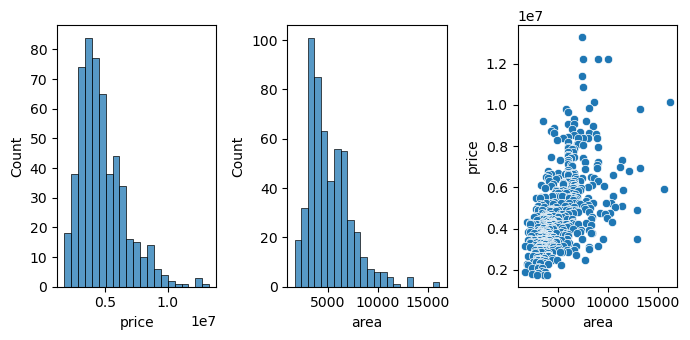

In [196]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]         #设置图表大小
plt.rcParams["figure.autolayout"] = True
figure, axes = plt.subplots(1, 3)                        #一行展现3个图表
sns.histplot(H["price"],ax=axes[0])                                       #ax=axes[0]左边展示这张图表
sns.histplot(H["area"],ax=axes[1])
sns.scatterplot(H,x="area",y="price",ax=axes[2]) 

房价呈现右偏态，说明存在价格较高房屋拉高均值。

面积呈现右偏态，说明存在面积较大房屋拉高均值。

房价与面积呈现类线性相关

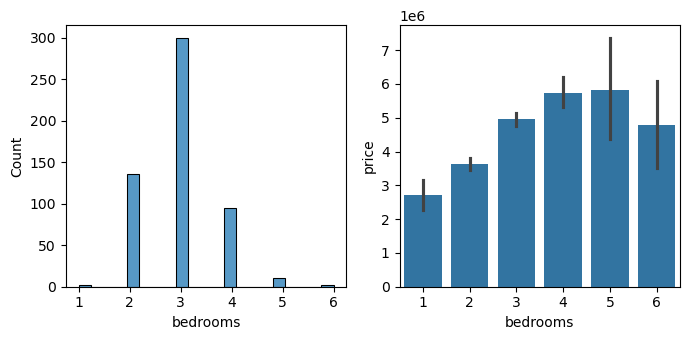

In [198]:
figure, axes = plt.subplots(1, 2)                        #一行展现3个图表
sns.histplot(H["bedrooms"],ax=axes[0])                                       #ax=axes[0]左边展示这张图表
sns.barplot(H,x="bedrooms",y="price",ax=axes[1]) 
plt.show()

当卧室数小于5个时，卧室数多的房子价格也相应高，但一旦多于5个，房价并不一定相应更高。房价可能和卧室数量二次项相关

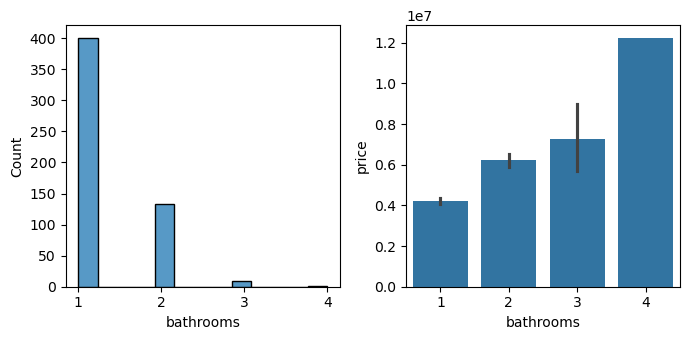

In [200]:
figure, axes = plt.subplots(1, 2)                        #一行展现3个图表
sns.histplot(H["bathrooms"],ax=axes[0])                                       #ax=axes[0]左边展示这张图表
sns.barplot(H,x="bathrooms",y="price",ax=axes[1]) 
plt.show()

洗手间多的房子价格也相应高。房价可能和洗手间数量有线性相关

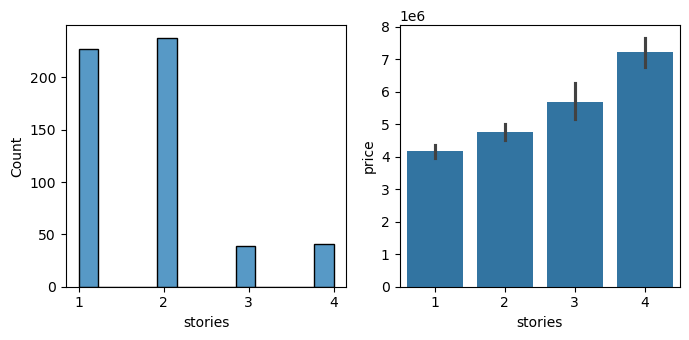

In [202]:
figure, axes = plt.subplots(1, 2)                        #一行展现3个图表
sns.histplot(H["stories"],ax=axes[0])                                       #ax=axes[0]左边展示这张图表
sns.barplot(H,x="stories",y="price",ax=axes[1]) 
plt.show()

楼层多的房子价格也相应高。房价可能和楼层数有线性相关

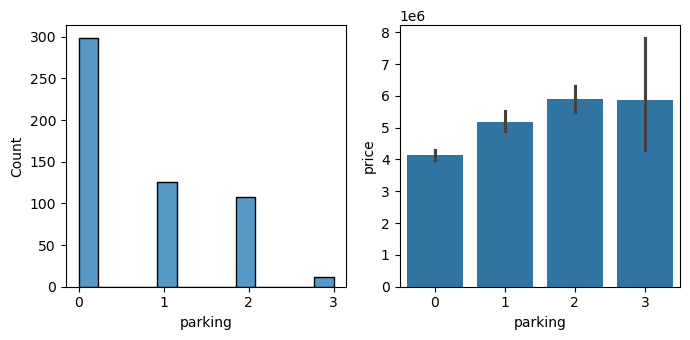

In [204]:
figure, axes = plt.subplots(1, 2)                        #一行展现3个图表
sns.histplot(H["parking"],ax=axes[0])                                       #ax=axes[0]左边展示这张图表
sns.barplot(H,x="parking",y="price",ax=axes[1]) 
plt.show()

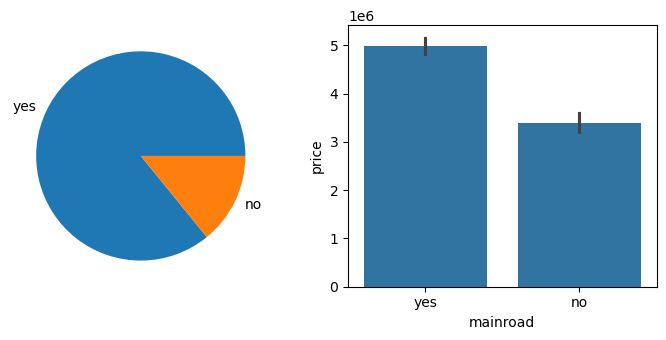

In [208]:
figure, axes = plt.subplots(1, 2)                        #一行展现3个图表
axes[0].pie(H["mainroad"].value_counts(),labels=H["mainroad"].value_counts().index)                                     #ax=axes[0]左边展示这张图表
sns.barplot(H,x="mainroad",y="price",ax=axes[1]) 
plt.show()

此数据大多房子位于主路，位于主路的房子价格更高

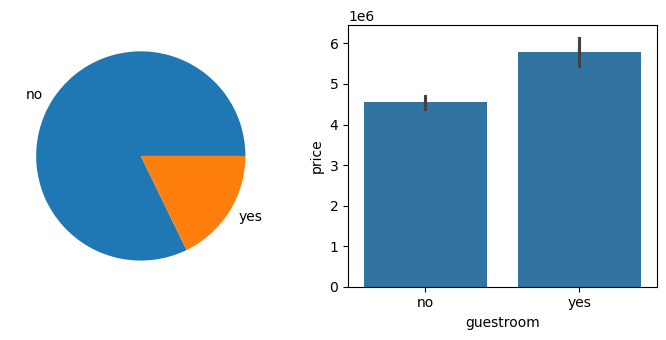

In [212]:
figure, axes = plt.subplots(1, 2)                        #一行展现3个图表
axes[0].pie(H["guestroom"].value_counts(),labels=H["guestroom"].value_counts().index)                                     #ax=axes[0]左边展示这张图表
sns.barplot(H,x="guestroom",y="price",ax=axes[1]) 
plt.show()

此数据大多房子没有客房，有客房的房子价格更高

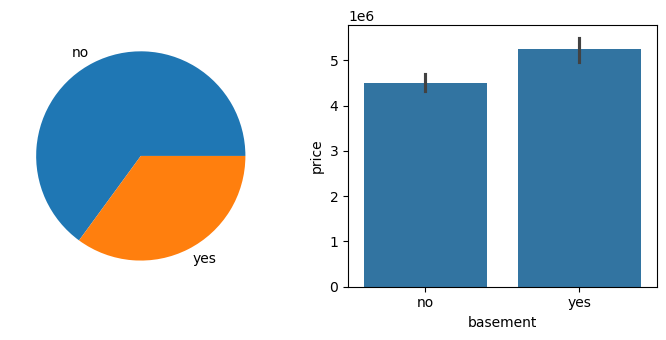

In [214]:
figure, axes = plt.subplots(1, 2)                        #一行展现3个图表
axes[0].pie(H["basement"].value_counts(),labels=H["basement"].value_counts().index)                                     #ax=axes[0]左边展示这张图表
sns.barplot(H,x="basement",y="price",ax=axes[1]) 
plt.show()

此数据较多房子没有地下室，有地下室的房子价格更高

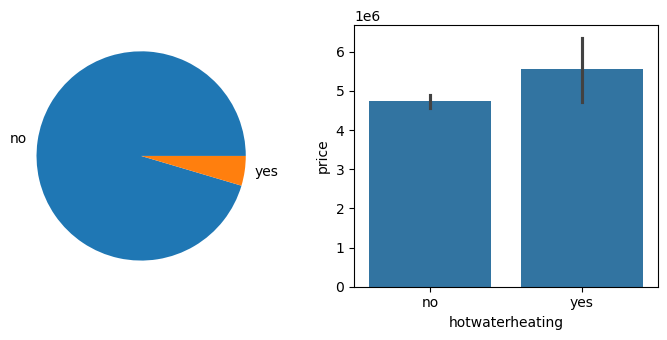

In [216]:
figure, axes = plt.subplots(1, 2)                        #一行展现3个图表
axes[0].pie(H["hotwaterheating"].value_counts(),labels=H["hotwaterheating"].value_counts().index)                                     #ax=axes[0]左边展示这张图表
sns.barplot(H,x="hotwaterheating",y="price",ax=axes[1]) 
plt.show()

此数据大多房子没有热水器，有热水器的房价更高

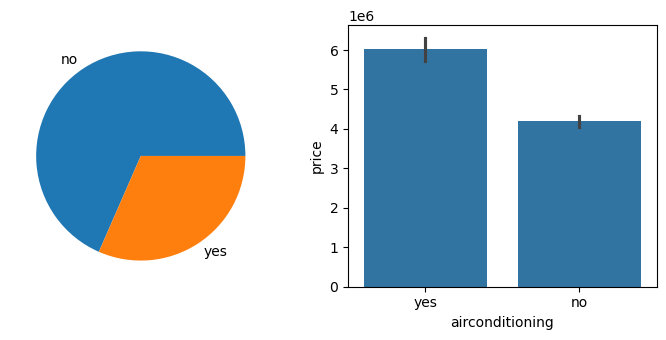

In [219]:
figure, axes = plt.subplots(1, 2)                      
axes[0].pie(H["airconditioning"].value_counts(),labels=H["airconditioning"].value_counts().index)                                     #ax=axes[0]左边展示这张图表
sns.barplot(H,x="airconditioning",y="price",ax=axes[1]) 
plt.show()	

此数据较多房子没有空调，有空调的房价更高

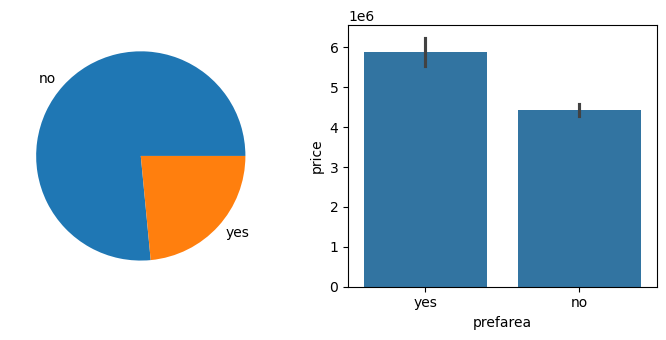

In [224]:
figure, axes = plt.subplots(1, 2)                      
axes[0].pie(H["prefarea"].value_counts(),labels=H["prefarea"].value_counts().index)                                     #ax=axes[0]左边展示这张图表
sns.barplot(H,x="prefarea",y="price",ax=axes[1]) 
plt.show()		

此数据较少房子位于城市首选社区，位于城市首选社区的房价更高

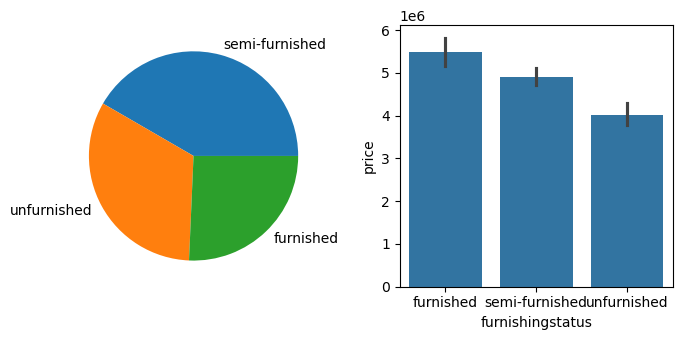

In [227]:
figure, axes = plt.subplots(1, 2)                      
axes[0].pie(H["furnishingstatus"].value_counts(),labels=H["furnishingstatus"].value_counts().index)                                     #ax=axes[0]左边展示这张图表
sns.barplot(H,x="furnishingstatus",y="price",ax=axes[1]) 
plt.show()		

房价毛坯小于简装修小于精装修

### 回归分析

把分类变量转为虚拟变量

In [456]:
import statsmodels.api as sm
H_new=pd.Categorical(H["furnishingstatus"],categories=["furnished","unfurnished","semi-furnished"])     
H_new=pd.get_dummies(H,columns=["mainroad",
                                "guestroom",
                                "basement",
                                "hotwaterheating",
                                "airconditioning",
                                "prefarea",
                                "furnishingstatus"],dtype=int,drop_first=True)
H_new.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


提取自变量和因变量

In [459]:
y=H_new["price"]
X=H_new.drop(["price"],axis=1)

给模型添加截距

In [462]:
X=sm.add_constant(X)
X.head(5)

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,1.0,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,1.0,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,1.0,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,1.0,7420,4,1,2,2,1,1,1,0,1,0,0,0


可视化中发现房间数和房价呈抛物线，添加自变量的二次项，且因为可能与自变量本身高度共线，还需中心化处理

In [465]:
# 添加中心化后的平方项
X["bedrooms_centered_sq"] = (X["bedrooms"]-X["bedrooms"].mean()) ** 2
X

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,bedrooms_centered_sq
0,1.0,7420,4,2,3,2,1,0,0,0,1,1,0,0,1.070940
1,1.0,8960,4,4,4,3,1,0,0,0,1,0,0,0,1.070940
2,1.0,9960,3,2,2,2,1,0,1,0,0,1,1,0,0.001215
3,1.0,7500,4,2,2,3,1,0,1,0,1,1,0,0,1.070940
4,1.0,7420,4,1,2,2,1,1,1,0,1,0,0,0,1.070940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.0,3000,2,1,1,2,1,0,1,0,0,0,0,1,0.931491
541,1.0,2400,3,1,1,0,0,0,0,0,0,0,1,0,0.001215
542,1.0,3620,2,1,1,0,1,0,0,0,0,0,0,1,0.931491
543,1.0,2910,3,1,1,0,0,0,0,0,0,0,0,0,0.001215


检查各自变量之间的相关系数是否过大，以及VIF

In [468]:
X.corr( ).abs()>0.8

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,bedrooms_centered_sq
const,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
area,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
stories,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
parking,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
mainroad_yes,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
guestroom_yes,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
basement_yes,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
hotwaterheating_yes,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [470]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Variable"] = X.columns  # 包含截距项 "const"
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# 过滤截距项（VIF 无意义）
vif = vif[vif["Variable"] != "const"]
print(vif)


                           Variable       VIF
1                              area  1.325257
2                          bedrooms  1.576137
3                         bathrooms  1.295082
4                           stories  1.552911
5                           parking  1.220167
6                      mainroad_yes  1.172932
7                     guestroom_yes  1.212892
8                      basement_yes  1.335352
9               hotwaterheating_yes  1.041655
10              airconditioning_yes  1.217030
11                     prefarea_yes  1.166820
12  furnishingstatus_semi-furnished  1.594806
13     furnishingstatus_unfurnished  1.676226
14             bedrooms_centered_sq  1.222366


建立回归模型

In [473]:
model=sm.OLS(y,X).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     81.12
Date:                Fri, 28 Mar 2025   Prob (F-statistic):          8.66e-122
Time:                        00:25:59   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     530   BIC:                         1.676e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.297e+04   2.65e+05      0.162      0.871   -4.78e+05    5.64e+05
area                              244.1389     24.312     10.042      0.000     196.380     291.898
bedrooms                         1.145e+05    7.8e+04      1.469      0.142   -3.86e+04    2.68e+05
bathrooms                        9.876e+05   1.04e+05      9.514      0.000    7.84e+05    1.19e+06
stories                           4.51e+05   6.58e+04      6.850      0.000    3.22e+05     5.8e+05
parking                          2.772e+05   5.88e+04      4.717      0.000    1.62e+05    3.93e+05
mainroad_yes                     4.213e+05   1.42e+05      2.959      0.003    1.42e+05    7.01e+05
guestroom_yes                    3.005e+05   1.32e+05      2.280      0.023    4.15e+04     5.6e+05
basement_yes                     3.502e+05   1.11e+05      3.158      0.002    1.32e+05    5.68e+05
hotwaterheating_yes              8.554e+05   2.23e+05      3.829      0.000    4.17e+05    1.29e+06
airconditioning_yes               8.65e+05   1.09e+05      7.959      0.000    6.52e+05    1.08e+06
prefarea_yes                     6.517e+05   1.17e+05      5.585      0.000    4.22e+05    8.81e+05
furnishingstatus_semi-furnished -4.623e+04   1.17e+05     -0.394      0.694   -2.77e+05    1.84e+05
furnishingstatus_unfurnished    -4.112e+05   1.26e+05     -3.253      0.001    -6.6e+05   -1.63e+05
bedrooms_centered_sq              550.7479   5.65e+04      0.010      0.992   -1.11e+05    1.12e+05
==============================================================================
Omnibus:                       97.913   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.279
Skew:                           0.895   Prob(JB):                     8.23e-57
Kurtosis:                       5.858   Cond. No.                     3.50e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

显著水平设置为0.05，从各自变量p值可看出，以下变量对房价没有显著影响：常数，卧室数，卧室平方，简装房，将这些变量移除后，重新建模

In [476]:
X=X.drop(["const","bedrooms","furnishingstatus_semi-furnished","bedrooms_centered_sq"],axis=1)

In [478]:
model=sm.OLS(y,X).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1088.
Date:                Fri, 28 Mar 2025   Prob (F-statistic):                        0.00
Time:                        00:26:01   Log-Likelihood:                         -8333.5
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     534   BIC:                                  1.674e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                           257.5854     22.577     11.409      0.000     213.234     301.936
bathrooms                     1.071e+06   9.27e+04     11.553      0.000    8.89e+05    1.25e+06
stories                       5.084e+05   5.71e+04      8.898      0.000    3.96e+05    6.21e+05
parking                       2.793e+05   5.83e+04      4.794      0.000    1.65e+05    3.94e+05
mainroad_yes                  4.672e+05   1.27e+05      3.679      0.000    2.18e+05    7.17e+05
guestroom_yes                 2.851e+05   1.31e+05      2.172      0.030    2.72e+04    5.43e+05
basement_yes                  4.016e+05   1.07e+05      3.765      0.000    1.92e+05    6.11e+05
hotwaterheating_yes           8.668e+05   2.23e+05      3.884      0.000    4.28e+05    1.31e+06
airconditioning_yes           8.543e+05   1.07e+05      7.952      0.000    6.43e+05    1.07e+06
prefarea_yes                  6.443e+05   1.15e+05      5.594      0.000    4.18e+05    8.71e+05
furnishingstatus_unfurnished -3.493e+05   9.49e+04     -3.679      0.000   -5.36e+05   -1.63e+05
==============================================================================
Omnibus:                       94.840   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.889
Skew:                           0.865   Prob(JB):                     2.01e-55
Kurtosis:                       5.845   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

重新建模后，R方从0.682提高到0.957，提高了模型对数据的拟合度。

模型预测以下因素的增加（或存在）会显著增加房屋价格：房屋面积、厕所数、楼层数、车库容量、位于主路、有客房、有地下室、有热水器、有空调、位于城市首选社区。

以下因素的增加（或存在）会显著降低房屋价格：房屋为毛坯房。

### 预测

根据以下因素预测房价：
  
面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。

In [527]:
X_new= pd.DataFrame({'area': [5600], 'bedrooms': [4], 'bathrooms': [2], 
                                 'stories': [2], 'mainroad': ['no'], 'guestroom': ['no'],
                                 'basement': ['yes'], 'hotwaterheating': ['yes'],
                                 'airconditioning': ['no'], 'parking': 2, 'prefarea': ['yes'],
                                 'furnishingstatus': ['semi-furnished']}) 

In [529]:
X_new["mainroad"]=pd.Categorical(X_new["mainroad"],categories=["no","yes"])
X_new["guestroom"]=pd.Categorical(X_new["guestroom"],categories=["no","yes"])
X_new["basement"]=pd.Categorical(X_new["basement"],categories=["no","yes"])
X_new["hotwaterheating"]=pd.Categorical(X_new["hotwaterheating"],categories=["no","yes"])
X_new["airconditioning"]=pd.Categorical(X_new["airconditioning"],categories=["no","yes"])
X_new["prefarea"]=pd.Categorical(X_new["prefarea"],categories=["no","yes"])
X_new["furnishingstatus"]=pd.Categorical(X_new["furnishingstatus"],categories=["furnished","unfurnished","semi-furnished"])

In [531]:
X_new=pd.get_dummies(X_new,columns=["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"],
                     dtype=int,drop_first=True)   

In [533]:
X_new

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_unfurnished,furnishingstatus_semi-furnished
0,5600,4,2,2,2,0,0,1,1,0,1,0,1


In [507]:
X_new=X_new.drop(["bedrooms","furnishingstatus_semi-furnished"],axis=1)

In [509]:
X_new

,area,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_unfurnished
0,5600,2,2,2,0,0,1,1,0,1,0


In [511]:
model.predict(X_new) 

0    7.071927e+06
dtype: float64

In [515]:
round(7.071927e+06,1)

7071927.0

回归模型预测的房价为7071927